SEGMENTAÇÃO DE IMAGENS COM OPENCV

IMPORTAÇÃO DAS BIBLIOTECAS

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

CARREGANDO A IMAGEM

In [15]:
imagem = cv2.imread('frutas.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

CONVERTENDO PARA ESCALA DE CINZA

In [16]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

LIMIARIZAÇÃO BINÁRIA

In [17]:
_, limiar_binaria = cv2.threshold(imagem_cinza, 127, 255, cv2.THRESH_BINARY)

LIMIARIZAÇÃO ADAPTATIVA

In [18]:
limiar_adaptativa = cv2.adaptiveThreshold(imagem_cinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

SEGMENTAÇÃO POR COR (HSV)

In [19]:
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Faixa de vermelho no HSV
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

mascara1 = cv2.inRange(imagem_hsv, lower_red1, upper_red1)
mascara2 = cv2.inRange(imagem_hsv, lower_red2, upper_red2)

mascara_vermelha = cv2.bitwise_or(mascara1, mascara2)
objeto_vermelho = cv2.bitwise_and(imagem_rgb, imagem_rgb, mask=mascara_vermelha)


EXEBIR OS RESULTADOS

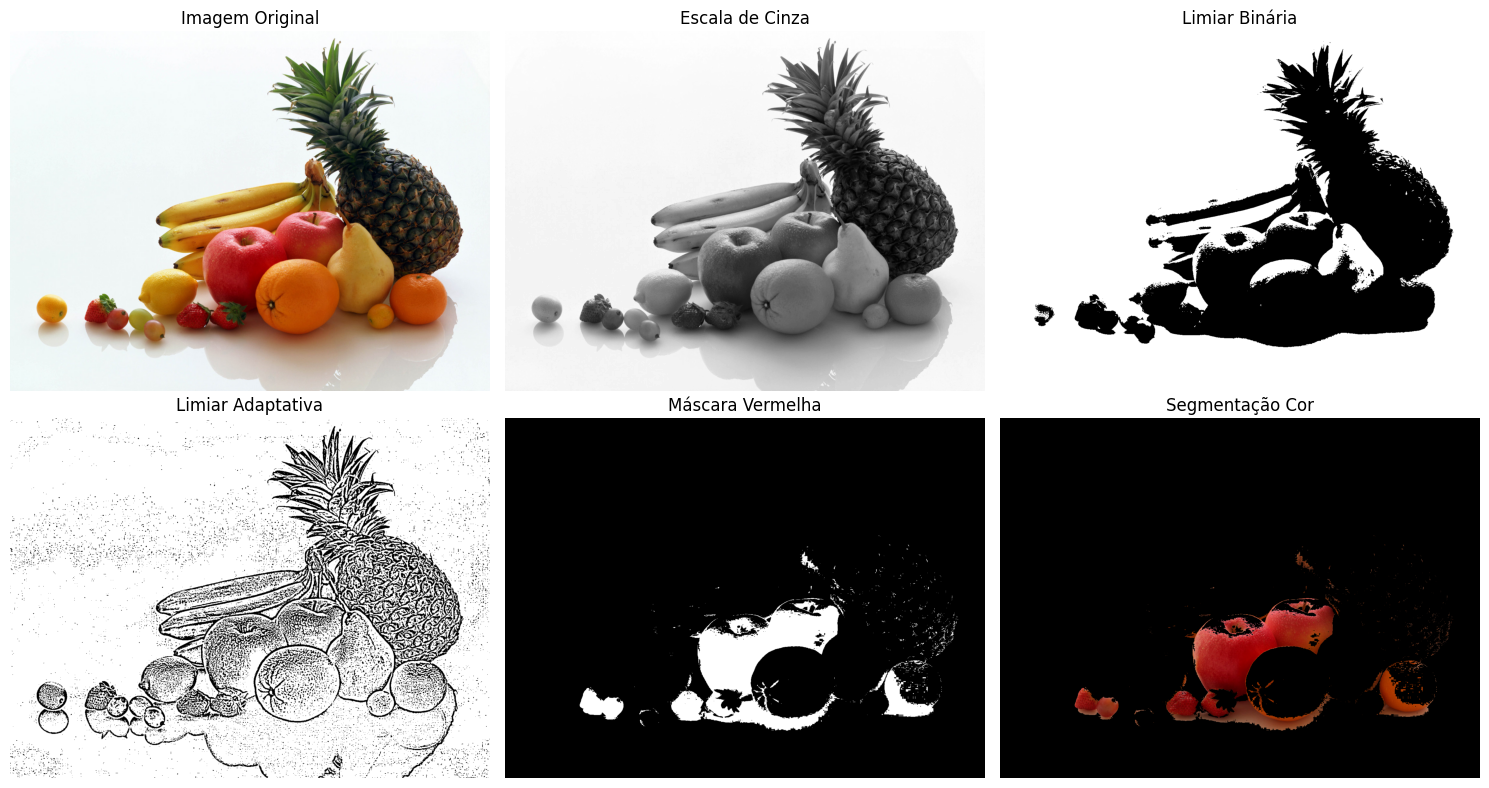

In [20]:
titulos = ['Imagem Original', 'Escala de Cinza', 'Limiar Binária',
           'Limiar Adaptativa', 'Máscara Vermelha', 'Segmentação Cor']

imagens = [imagem_rgb, imagem_cinza, limiar_binaria,
           limiar_adaptativa, mascara_vermelha, objeto_vermelho]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    if i == 1 or i == 2 or i == 3 or i == 4:
        plt.imshow(imagens[i], cmap='gray')
    else:
        plt.imshow(imagens[i])
    plt.title(titulos[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
